<a href="https://colab.research.google.com/github/Stella-Achar-Oiro/Fast-API-for-Sepsis-Prediction-App/blob/main/P6_EDA_ML_Fast_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Load the data
df_test = pd.read_csv('/content/drive/MyDrive/Paitients_Files_Test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Paitients_Files_Train.csv')


Test dataset:
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: flo

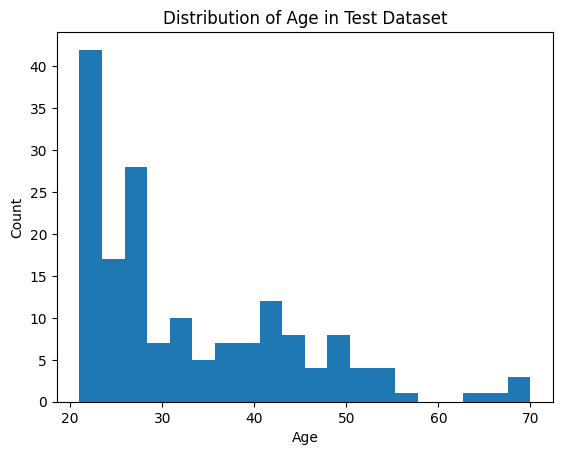

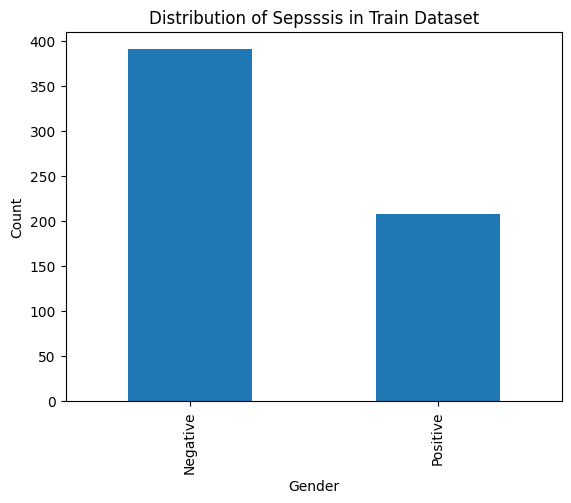

In [56]:

# Explore the data
print("Test dataset:")
print(df_test.head())  # Display the first few rows of the test dataset
print(df_test.info())  # Display information about the test dataset (e.g., columns, data types)

print("\nTrain dataset:")
print(df_train.head())  # Display the first few rows of the train dataset
print(df_train.info())  # Display information about the train dataset (e.g., columns, data types)

# Summary statistics
print("\nSummary statistics for test dataset:")
print(df_test.describe())  # Display summary statistics for the test dataset (e.g., count, mean, min, max, etc.)

print("\nSummary statistics for train dataset:")
print(df_train.describe())  # Display summary statistics for the train dataset (e.g., count, mean, min, max, etc.)

# Missing values
print("\nMissing values in test dataset:")
print(df_test.isnull().sum())  # Count the number of missing values in each column of the test dataset

print("\nMissing values in train dataset:")
print(df_train.isnull().sum())  # Count the number of missing values in each column of the train dataset

# Data visualization (example)
import matplotlib.pyplot as plt

# Histogram of a numerical column in the test dataset
plt.hist(df_test['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age in Test Dataset')
plt.show()

# Bar plot of a categorical column in the train dataset
df_train['Sepssis'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Sepsssis in Train Dataset')
plt.show()


Duplicates in test dataset: 0
Duplicates in train dataset: 0
Outliers in test dataset:
            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
67   ICU200676    4  145  82  18    0  32.5  0.235   70          1
75   ICU200684    8   91  82   0    0  35.6  0.587   68          0
85   ICU200694    5  136  82   0    0   0.0  0.640   69          1
160  ICU200769    6  190  92   0    0  35.5  0.278   66          0
164  ICU200773   10  101  76  48  180  32.9  0.171   63          1
Outliers in train dataset:
            ID  PRG   PL   PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
12   ICU200022   10  139   80   0    0  27.1  1.441   57          1  Negative
13   ICU200023    1  189   60  23  846  30.1  0.398   59          1  Positive
28   ICU200038   13  145   82  19  110  22.2  0.245   57          1  Negative
30   ICU200040    5  109   75  26    0  36.0  0.546   60          1  Negative
53   ICU200063    8  176   90  34  300  33.7  0.467   58          1  Positive
93   ICU200103  

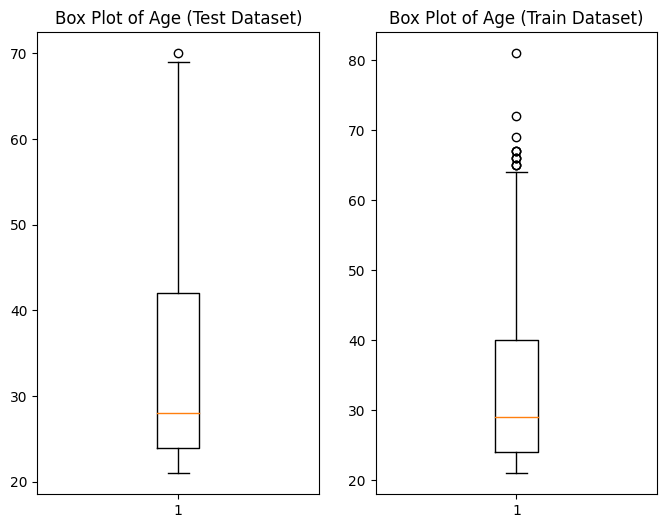

In [57]:
# Check for duplicates
print("Duplicates in test dataset:", df_test.duplicated().sum())
print("Duplicates in train dataset:", df_train.duplicated().sum())

# Identify outliers (Using 'Age' column)
outlier_threshold = 2  # Adjust this value to define the outlier threshold

test_outliers = df_test[(df_test['Age'] > df_test['Age'].mean() + outlier_threshold * df_test['Age'].std()) |
                        (df_test['Age'] < df_test['Age'].mean() - outlier_threshold * df_test['Age'].std())]

train_outliers = df_train[(df_train['Age'] > df_train['Age'].mean() + outlier_threshold * df_train['Age'].std()) |
                          (df_train['Age'] < df_train['Age'].mean() - outlier_threshold * df_train['Age'].std())]

print("Outliers in test dataset:")
print(test_outliers)

print("Outliers in train dataset:")
print(train_outliers)

# Plot outliers using box plots (assuming 'age' column for demonstration)
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df_test['Age'])
plt.title('Box Plot of Age (Test Dataset)')

plt.subplot(1, 2, 2)
plt.boxplot(df_train['Age'])
plt.title('Box Plot of Age (Train Dataset)')

plt.show()


<ipython-input-58-e00589fad36a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_concatenated.corr()


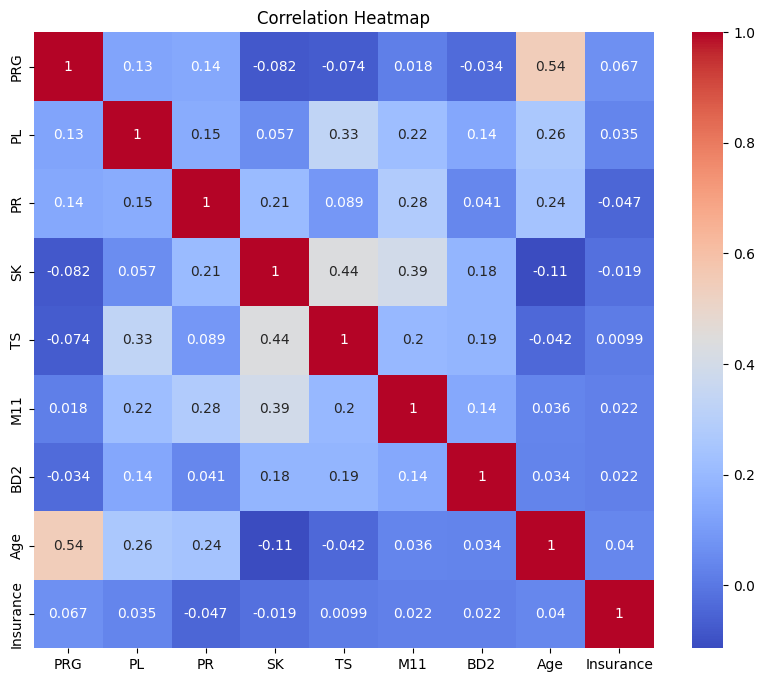

In [58]:
# Concatenate the datasets
df_concatenated = pd.concat([df_train, df_test], ignore_index=True)

# Calculate correlation matrix
correlation_matrix = df_concatenated.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Null hypothesis: Older people have the tendency of developing sepsis
Alternate hypothesis: Younger people have higher tendency of developing sepsis

Questions
1. How many patients have the tendency of developing sepsis
2. Which age group are more prone to developing sepsis
3. Does having an insurance enhance patients chances of getting sepsis
4. Which blood parameters are associated with sepsis
5. Is body mass directly correlated with a patients tendency to get sepsis

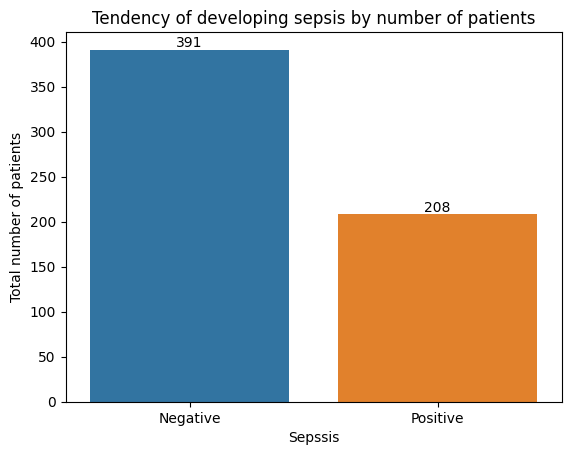

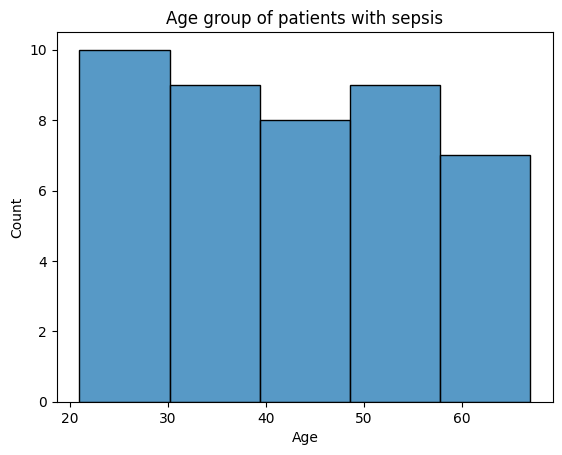

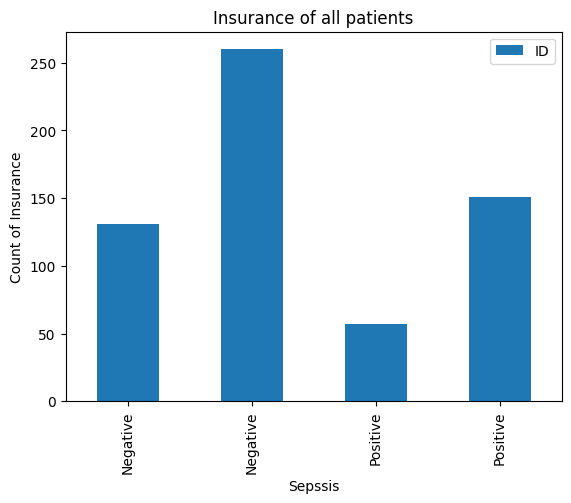

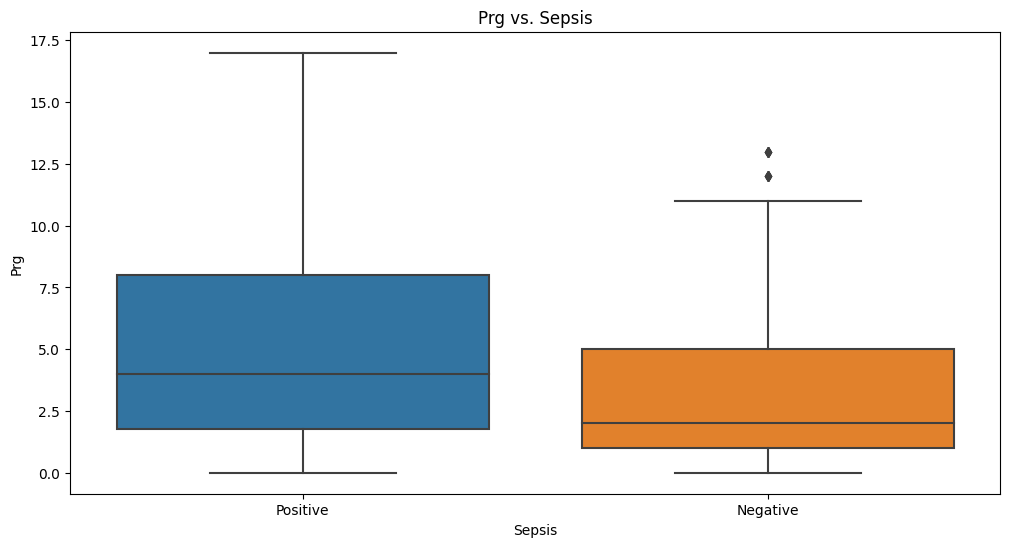

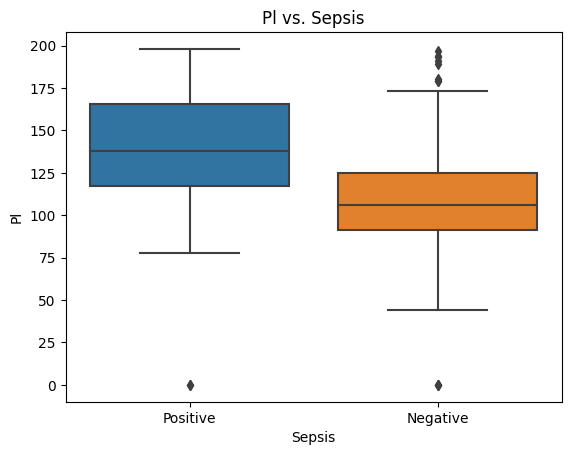

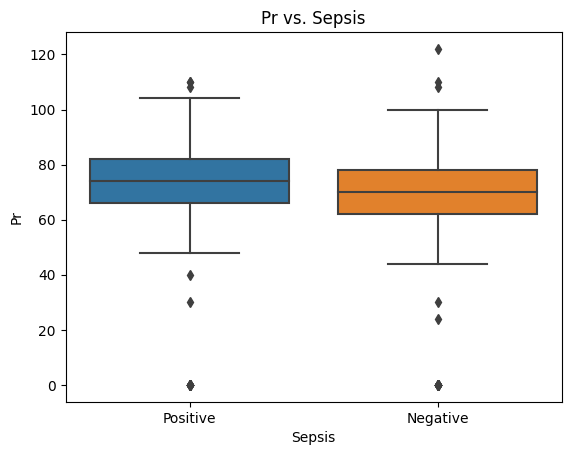

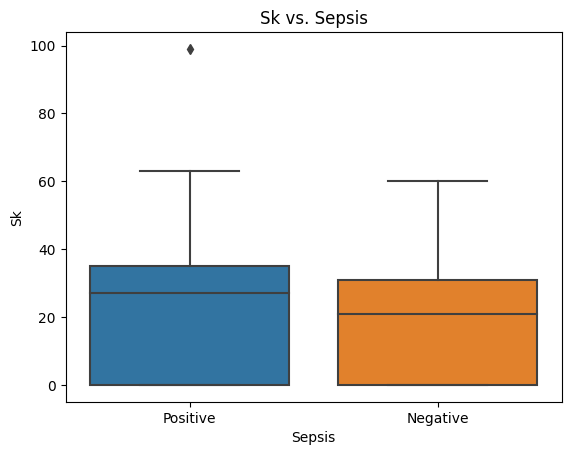

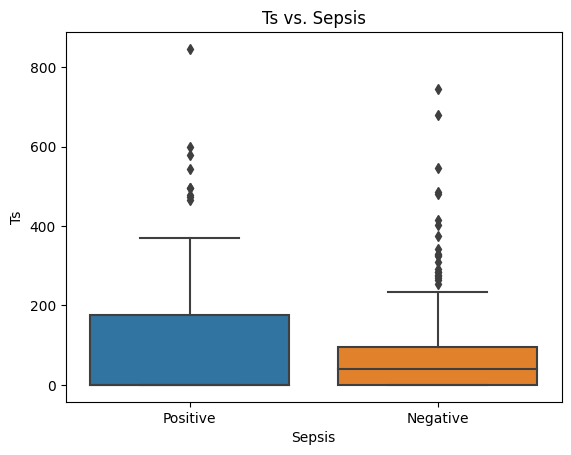

Text(0.5, 1.0, 'Body mass of patient without Sepsis')

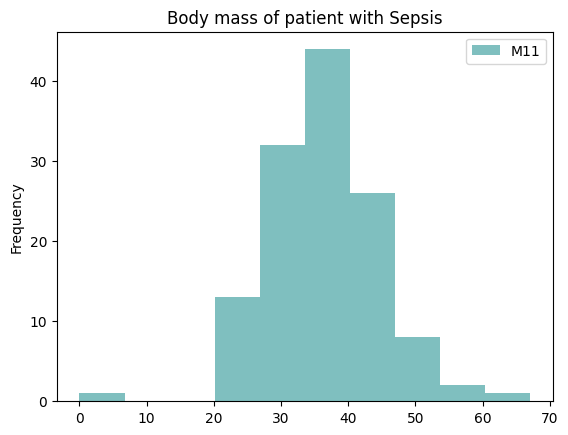

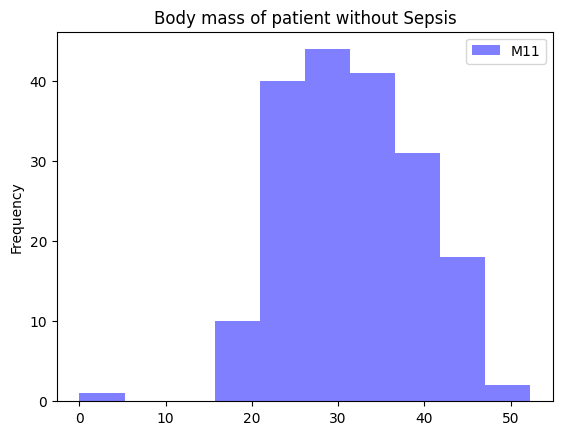

In [59]:
# Research Question 1: How many patients have the tendency of developing sepsis?
sep  = df_train.groupby('Sepssis', as_index=False)['ID'].count()
splot = sns.barplot(data=sep, x='Sepssis', y='ID')
plt.xlabel("Sepssis")
plt.ylabel("Total number of patients")
plt.title('Tendency of developing sepsis by number of patients')
plt.bar_label(splot.containers[0], size=10)
plt.show()
# Research Question 2: Which age group is more prone to developing sepsis?
#age group count of patients with sepsis
age_group = df_train[df_train.Sepssis == 'Positive'].groupby('Age', as_index=False)['ID'].count()
sns.histplot(data=age_group, x="Age", bins=5)
plt.title('Age group of patients with sepsis')


# Research Question 3: Does having insurance enhance patients' chances of getting sepsis?
insured = df_train.groupby(['Sepssis', 'Insurance'], as_index=False)['ID'].count()
insured.plot(kind='bar', x='Sepssis', y='ID')
plt.ylabel('Count of Insurance')
plt.title('Insurance of all patients')

# Research Question 4: Which blood parameters are associated with sepsis?
blood_params = ['PRG', 'PL', 'PR', 'SK', 'TS']
plt.figure(figsize=(12, 6))
for param in blood_params:
    sns.boxplot(x='Sepssis', y=param, data=df_concatenated)
    plt.title(f'{param.capitalize()} vs. Sepsis')
    plt.xlabel('Sepsis')
    plt.ylabel(param.capitalize())
    plt.show()

# Research Question 5: Is body mass directly correlated with a patient's tendency to get sepsis?
body_mass = df_train.groupby(['Sepssis', 'M11'], as_index=False)['ID'].count()
hist1 = body_mass[body_mass.Sepssis == 'Positive']
hist2 = body_mass[body_mass.Sepssis == 'Negative']
hist1.plot(kind='hist', column = 'M11', bins = 10, color = 'teal', \
           alpha = 0.5 )
plt.title('Body mass of patient with Sepsis')

hist2.plot(kind='hist', column = 'M11', bins = 10, color = 'blue', \
            alpha = 0.5)
plt.title('Body mass of patient without Sepsis')

In [60]:
# Check for missing values in the DataFrame
print("Number of missing values before correction:")
print(df_concatenated.isnull().sum())

from sklearn.impute import SimpleImputer

# Select the columns with missing values
columns_with_missing_values = ['Sepssis']

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Replace NaN with the mean of each column

# Fit the imputer on the data
imputer.fit(df_concatenated[columns_with_missing_values])

# Transform the data by replacing missing values
df_concatenated[columns_with_missing_values] = imputer.transform(df_concatenated[columns_with_missing_values])

# Check the number of missing values after imputation
print("Number of missing values after imputation:")
print(df_concatenated.isnull().sum())


Number of missing values before correction:
ID             0
PRG            0
PL             0
PR             0
SK             0
TS             0
M11            0
BD2            0
Age            0
Insurance      0
Sepssis      169
dtype: int64
Number of missing values after imputation:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64


In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert 'ID' column to numeric using LabelEncoder
label_encoder = LabelEncoder()
df_concatenated['ID_encoded'] = label_encoder.fit_transform(df_concatenated['ID'])

# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'ID_encoded' column
icu_id_encoded = onehot_encoder.fit_transform(df_concatenated['ID_encoded'].values.reshape(-1, 1))

# Get the unique categories from the 'ID_encoded' column
categories = label_encoder.classes_

# Create a dataframe from the encoded array
df_encoded = pd.DataFrame(icu_id_encoded, columns=[f'ID_{category}' for category in categories])

# Drop the original 'ID' and 'ID_encoded' columns
df_concatenated.drop(['ID', 'ID_encoded'], axis=1, inplace=True)

# Concatenate the original dataframe and the encoded dataframe
df_concatenated_encoded = pd.concat([df_concatenated, df_encoded], axis=1)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib


# Select features and target variable
X = df_concatenated_encoded [['Age', 'Insurance', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11']]
y = df_concatenated_encoded ['Sepssis']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_confusion_matrix = confusion_matrix(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:")
print(logreg_confusion_matrix)

# Model 2: Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)

# Model 3: Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Confusion Matrix:")
print(gb_confusion_matrix)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7597402597402597
Logistic Regression Confusion Matrix:
[[98 15]
 [22 19]]
Random Forest Accuracy: 0.7727272727272727
Random Forest Confusion Matrix:
[[100  13]
 [ 22  19]]
Gradient Boosting Accuracy: 0.7402597402597403
Gradient Boosting Confusion Matrix:
[[93 20]
 [20 21]]


In [63]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_concatenated_encoded.drop('Sepssis', axis=1),  
    df_concatenated_encoded['Sepssis'],
    test_size=0.2,
    random_state=42
    )

# Define the models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Fit the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
logreg_preds_encoded = label_encoder.transform(logreg_preds)
rf_preds_encoded = label_encoder.transform(rf_preds)
gb_preds_encoded = label_encoder.transform(gb_preds)

# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_test_encoded, logreg_preds_encoded)
rf_accuracy = accuracy_score(y_test_encoded, rf_preds_encoded)
gb_accuracy = accuracy_score(y_test_encoded, gb_preds_encoded)

logreg_precision = precision_score(y_test_encoded, logreg_preds_encoded)
rf_precision = precision_score(y_test_encoded, rf_preds_encoded)
gb_precision = precision_score(y_test_encoded, gb_preds_encoded)

logreg_recall = recall_score(y_test_encoded, logreg_preds_encoded)
rf_recall = recall_score(y_test_encoded, rf_preds_encoded)
gb_recall = recall_score(y_test_encoded, gb_preds_encoded)

logreg_f1 = f1_score(y_test_encoded, logreg_preds_encoded)
rf_f1 = f1_score(y_test_encoded, rf_preds_encoded)
gb_f1 = f1_score(y_test_encoded, gb_preds_encoded)

logreg_roc_auc = roc_auc_score(y_test_encoded, logreg_preds_encoded)
rf_roc_auc = roc_auc_score(y_test_encoded, rf_preds_encoded)
gb_roc_auc = roc_auc_score(y_test_encoded, gb_preds_encoded)


# Print evaluation metrics
print("Logistic Regression:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-score:", logreg_f1)
print("ROC-AUC:", logreg_roc_auc)
print()

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("ROC-AUC:", rf_roc_auc)
print()

print("Gradient Boosting:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-score:", gb_f1)
print("ROC-AUC:", gb_roc_auc)
print()

# Perform cross-validation
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.7272727272727273
Precision: 0.47368421052631576
Recall: 0.21951219512195122
F1-score: 0.3
ROC-AUC: 0.5655083099503561

Random Forest:
Accuracy: 0.8051948051948052
Precision: 0.7619047619047619
Recall: 0.3902439024390244
F1-score: 0.5161290322580646
ROC-AUC: 0.6729980574142024

Gradient Boosting:
Accuracy: 0.7857142857142857
Precision: 0.6428571428571429
Recall: 0.43902439024390244
F1-score: 0.5217391304347826
ROC-AUC: 0.6752644075113317



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [64]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_model = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7668788727612258


In [65]:
# Save the best model (Random Forest in this case) for deployment
joblib.dump(rf_model, 'sepsis_prediction_model.pkl')

['sepsis_prediction_model.pkl']

In [66]:
!pip install fastapi
from fastapi import FastAPI
from pydantic import BaseModel
import pickle

# Define the input data model
class InputData(BaseModel):
    Age: int
    Insurance: int
    PRG: float
    PL: float
    PR: float
    SK: float
    TS: float
    M11: float

# Load the saved model
model_path = '/content/sepsis_prediction_model.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Create the FastAPI app
app = FastAPI()

# Define the prediction endpoint
@app.post("/predict")
def predict_sepsis(data: InputData):
    # Convert input data to a feature vector
    feature_vector = [[
        data.Age,
        data.Insurance,
        data.PRG,
        data.PL,
        data.PR,
        data.SK,
        data.TS,
        data.M11
    ]]

    # Make the prediction
    prediction = model.predict(feature_vector)
    probability = model.predict_proba(feature_vector)[:, 1]

    # Prepare the response
    response = {
        "prediction": prediction[0],
        "probability": probability[0]
    }

    return response


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.4 MB/s eta 0:00:00


In [67]:
!curl -fsSL https://get.docker.com -o get-docker.sh
!sh get-docker.sh


# Executing docker install script, commit: a8a6b338bdfedd7ddefb96fe3e7fe7d4036d945a
+ sh -c apt-get update -qq >/dev/null
+ sh -c DEBIAN_FRONTEND=noninteractive apt-get install -y -qq apt-transport-https ca-certificates curl >/dev/null
+ sh -c mkdir -p /etc/apt/keyrings && chmod -R 0755 /etc/apt/keyrings
+ sh -c curl -fsSL "https://download.docker.com/linux/ubuntu/gpg" | gpg --dearmor --yes -o /etc/apt/keyrings/docker.gpg
+ sh -c chmod a+r /etc/apt/keyrings/docker.gpg
+ sh -c echo "deb [arch=amd64 signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/ubuntu focal stable" > /etc/apt/sources.list.d/docker.list
+ sh -c apt-get update -qq >/dev/null
+ sh -c DEBIAN_FRONTEND=noninteractive apt-get install -y -qq docker-ce docker-ce-cli containerd.io docker-compose-plugin docker-ce-rootless-extras docker-buildx-plugin >/dev/null


To run Docker as a non-privileged user, consider setting up the
Docker daemon in rootless mode for your user:

    dockerd-rootless-setuptool.sh

In [68]:
%%writefile Dockerfile
FROM python:3.10-slim
WORKDIR /app
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt
COPY main.py .
EXPOSE 8000
CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8000"]


Writing Dockerfile


In [69]:
%%writefile requirements.txt
fastapi==0.95.2
uvicorn==0.15.0
pydantic==1.10.7


Writing requirements.txt


In [70]:
%%writefile main.py
from fastapi import FastAPI

app = FastAPI()

# Define the prediction endpoint
@app.post("/predict")
def predict_sepsis(data: InputData):
    # Convert input data to a feature vector
    feature_vector = [[
        data.Age,
        data.Insurance,
        data.PRG,
        data.PL,
        data.PR,
        data.SK,
        data.TS,
        data.M11
    ]]

    # Make the prediction
    prediction = model.predict(feature_vector)
    probability = model.predict_proba(feature_vector)[:, 1]

    # Prepare the response
    response = {
        "prediction": prediction[0],
        "probability": probability[0]
    }

    return response


Writing main.py


In [78]:
!docker build -t sepsis-prediction-app .


ERROR: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?


In [72]:
!docker run -d -p 8000:8000 sepsis-prediction-app


docker: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?.
See 'docker run --help'.


In [77]:
!docker tag sepsis-prediction-app git clone https://huggingface.co/spaces/Achar/Fast-API



"docker tag" requires exactly 2 arguments.
See 'docker tag --help'.

Usage:  docker tag SOURCE_IMAGE[:TAG] TARGET_IMAGE[:TAG]

Create a tag TARGET_IMAGE that refers to SOURCE_IMAGE


In [74]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [73]:
!pip install huggingface_hub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.4 MB/s eta 0:00:00
